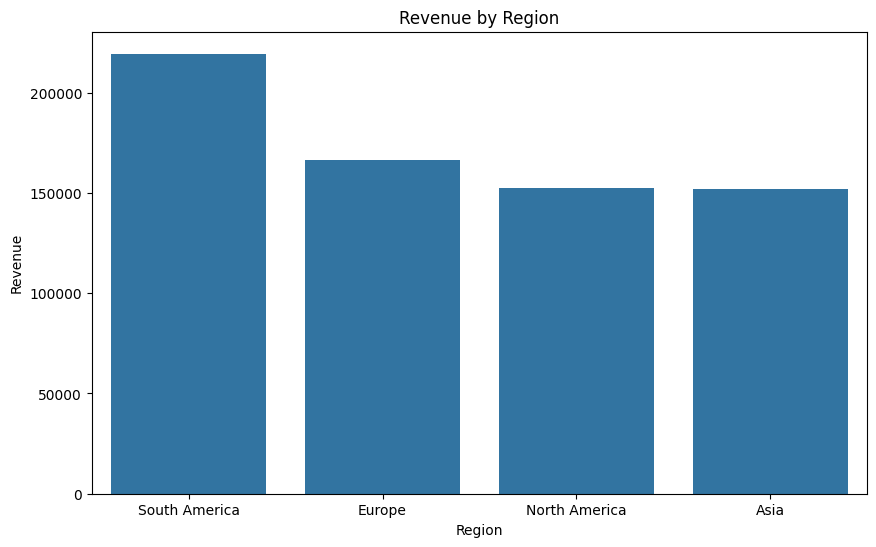

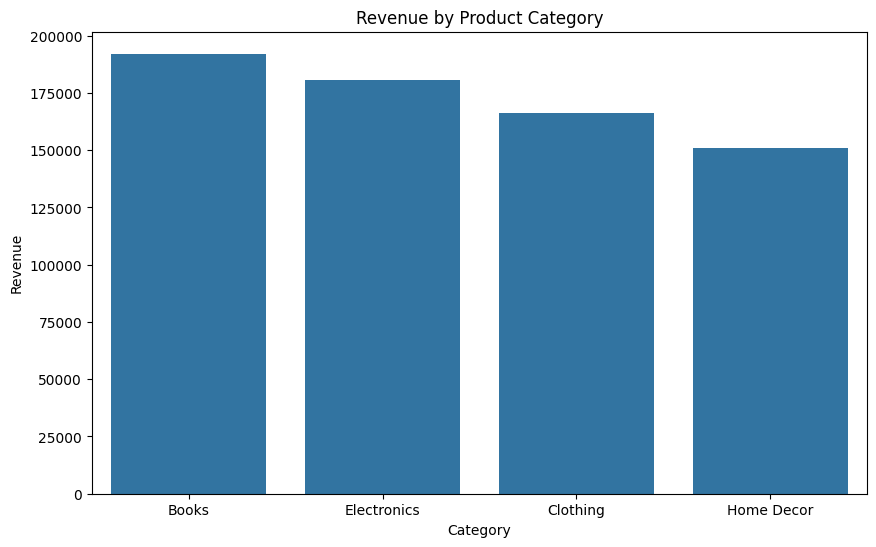

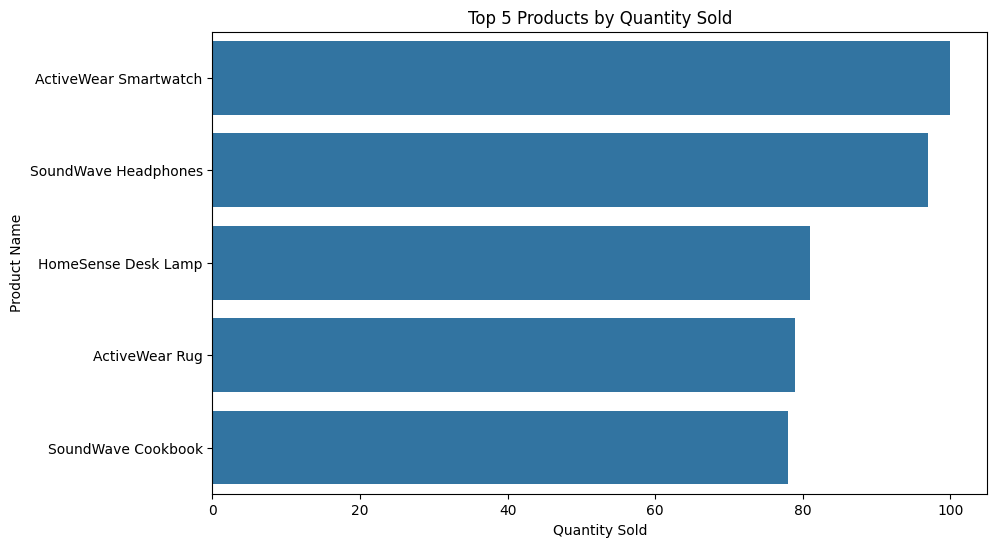

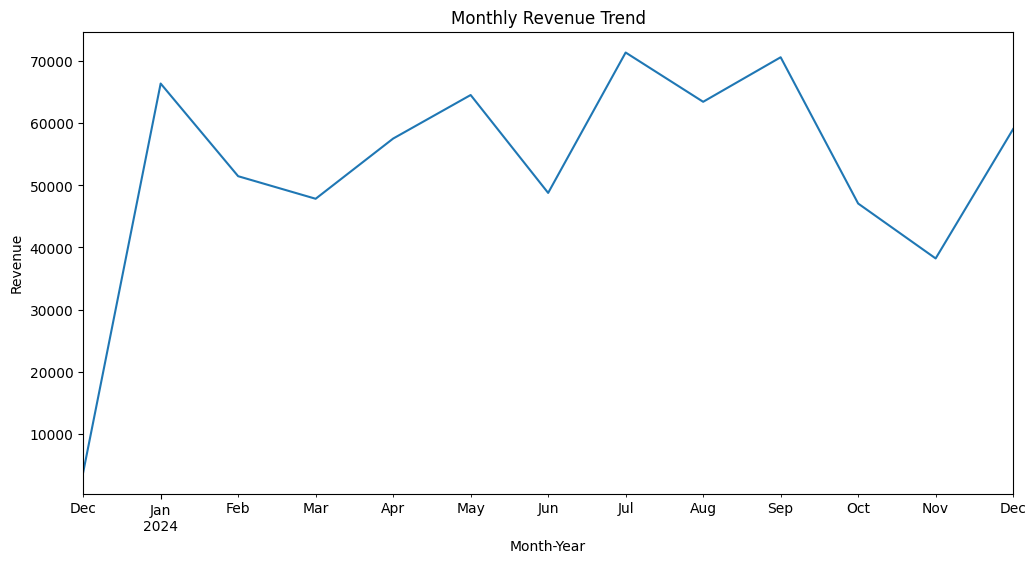

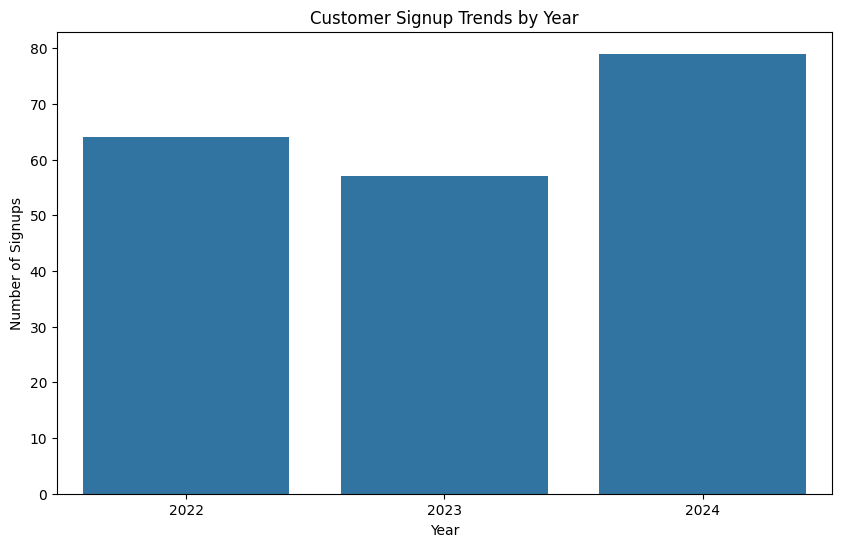

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

customers = customers.drop_duplicates()
products = products.drop_duplicates()
transactions = transactions.drop_duplicates()

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

customers['Region'] = customers['Region'].str.title()
products['Category'] = products['Category'].str.title()

transactions_merged = transactions.merge(products, on='ProductID', how='left')
transactions_merged = transactions_merged.merge(customers, on='CustomerID', how='left')

region_revenue = transactions_merged.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=region_revenue.index, y=region_revenue.values)
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.show()

category_sales = transactions_merged.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.show()

top_products = transactions_merged.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 5 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

transactions_merged['MonthYear'] = transactions_merged['TransactionDate'].dt.to_period('M')
monthly_revenue = transactions_merged.groupby('MonthYear')['TotalValue'].sum()
monthly_revenue.plot(figsize=(12, 6), title='Monthly Revenue Trend', xlabel='Month-Year', ylabel='Revenue')
plt.show()

signup_trends = customers['SignupDate'].dt.year.value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=signup_trends.index, y=signup_trends.values)
plt.title('Customer Signup Trends by Year')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()
